In [1]:
import pandas as pd
import os

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

os.chdir('/Users/sarahherberger/Documents/<>')

Questions = pd.read_excel('BAI Data Science Case Study_Heart.xlsx', sheet_name='Questions')
Questions['Unnamed: 1']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    NaN
1                                                                                                                                                                                                                                                                                                                              

## Goals:
* main contributing factors toward heart disease
* create a predictive model to identify the main contributing factors towards heart disease

In [2]:
xls = pd.ExcelFile('BAI Data Science Case Study_Heart.xlsx')
xls.sheet_names

['Questions',
 'Data',
 'Heart_Disease_Patient_Data',
 'Heart_Disease_Patient_Data_Dict']

In [3]:
Data = pd.read_excel('BAI Data Science Case Study_Heart.xlsx', sheet_name='Data', header = 3)
Data.head(20)

Patient_ID Site_ID Doctor_ID Product_ID   Month Quantity  Unnamed: 6  \
0        2038    S150     D0082      PD390  201201        1         NaN   
1        2038    S150     D0082      PD395  201201        2         NaN   
2        2038    S150     D0082      PD390  201212        2         NaN   
3        2038    S150     D0082      PD395  201202        4         NaN   
4        2038    S150     D0082      PD395  201203        4         NaN   
5        2038    S150     D0082      PD395  201204        8         NaN   
6        2038    S150     D0082      PD395  201205        8         NaN   
7        2038    S150     D0082      PD395  201206        8         NaN   
8        2038    S168     D0120      PD398  201207        4         NaN   
9        2038    S168     D0120      PD398  201208        4         NaN   
10       2038    S168     D0120      PD398  201209        4         NaN   
11       2038    S168     D0120      PD398  201210        4         NaN   
12       2038    S168     D0120      PD398  201211        4         NaN   
13       2038    S168     D0120      PD398  201212        4         NaN   
14       2425    S082       NaN      PD390  200508        1         NaN   
15       2425    S082       NaN      PD202  200508       56         NaN   
16       2425    S082       NaN      PD811  200508       28         NaN   
17          …       …         …          …       …        …         NaN   
18          …       …         …          …       …        …         NaN   
19        NaN     NaN       NaN        NaN     NaN      NaN         NaN   

    Unnamed: 7 Patient_ID.1 drug_390_admin_flag (1=Y,0=N)  ER_positive  \
0          NaN         2038                             1          1.0   
1          NaN         2120                             0          1.0   
2          NaN         2175                             0          0.0   
3          NaN         2407                             0          0.0   
4          NaN         2425                             1          0.0   
5          NaN         2462                             0          0.0   
6          NaN         2634                             0          1.0   
7          NaN         2735                             1          0.0   
8          NaN         2763                             0          0.0   
9          NaN         2770                             0          1.0   
10         NaN         3095                             0          1.0   
11         NaN         3449                             0          0.0   
12         NaN         3757                             1          1.0   
13         NaN         3948                             0          1.0   
14         NaN         4256                             0          1.0   
15         NaN         4354                             0          1.0   
16         NaN         4374                             0          1.0   
17         NaN         4692                             0          1.0   
18         NaN         5259                             0          1.0   
19         NaN         5657                             1          0.0   

    PR_positive  HER2_positive  
0           1.0            0.0  
1           0.0            1.0  
2           0.0            0.0  
3           1.0            0.0  
4           0.0            0.0  
5           0.0            0.0  
6           0.0            0.0  
7           1.0            0.0  
8           1.0            1.0  
9           0.0            0.0  
10          1.0            1.0  
11          1.0            0.0  
12          0.0            0.0  
13          0.0            1.0  
14          1.0            1.0  
15          0.0            0.0  
16          0.0            0.0  
17          1.0            1.0  
18          0.0            1.0  
19          1.0            1.0

In [4]:
non_nan_counts = Data.count()

print(non_nan_counts)
## okay to drop unnamed 6 & 7

Patient_ID                        28
Site_ID                           26
Doctor_ID                         23
Product_ID                        26
Month                             19
Quantity                          19
Unnamed: 6                         0
Unnamed: 7                         0
Patient_ID.1                     378
drug_390_admin_flag (1=Y,0=N)    377
ER_positive                       37
PR_positive                       37
HER2_positive                     37
dtype: int64


In [5]:
df = pd.read_excel('BAI Data Science Case Study_Heart.xlsx', sheet_name='Heart_Disease_Patient_Data', header = 3)
df = df.drop(['Unnamed: 0'], axis=1)
df.head(20)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1   3       145   233    1        0      150      0      2.3   
1    37    1   2       130   250    0        1      187      0      3.5   
2    41    0   1       130   204    0        0      172      0      1.4   
3    56    1   1       120   236    0        1      178      0      0.8   
4    57    0   0       120   354    0        1      163      1      0.6   
5    57    1   0       140   192    0        1      148      0      0.4   
6    56    0   1       140   294    0        0      153      0      1.3   
7    44    1   1       120   263    0        1      173      0      0.0   
8    52    1   2       172   199    1        1      162      0      0.5   
9    57    1   2       150   168    0        1      174      0      1.6   
10   54    1   0       140   239    0        1      160      0      1.2   
11   48    0   2       130   275    0        1      139      0      0.2   
12   49    1   1       130   266    0        1      171      0      0.6   
13   64    1   3       110   211    0        0      144      1      1.8   
14   58    0   3       150   283    1        0      162      0      1.0   
15   50    0   2       120   219    0        1      158      0      1.6   
16   58    0   2       120   340    0        1      172      0      0.0   
17   66    0   3       150   226    0        1      114      0      2.6   
18   43    1   0       150   247    0        1      171      0      1.5   
19   69    0   3       140   239    0        1      151      0      1.8   

    slope  ca  thal  target  
0       0   0     1       1  
1       0   0     2       1  
2       2   0     2       1  
3       2   0     2       1  
4       2   0     2       1  
5       1   0     1       1  
6       1   0     2       1  
7       2   0     3       1  
8       2   0     3       1  
9       2   0     2       1  
10      2   0     2       1  
11      2   0     2       1  
12      2   0     2       1  
13      1   0     2       1  
14      2   0     2       1  
15      1   0     2       1  
16      2   0     2       1  
17      0   0     2       1  
18      2   0     2       1  
19      2   2     2       1

In [6]:
non_nan_counts = df.count()

print(non_nan_counts)
## okay to drop unnamed 0

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64


In [7]:
Heart_Disease_Patient_Data_Dict = pd.read_excel('BAI Data Science Case Study_Heart.xlsx', sheet_name='Heart_Disease_Patient_Data_Dict', header = 3)
Heart_Disease_Patient_Data_Dict = Heart_Disease_Patient_Data_Dict.drop(['Unnamed: 0'], axis=1)
Heart_Disease_Patient_Data_Dict.head(15)

Variable                                                     Description
0        age                                                    age in years
1        sex                                          (1 = male; 0 = female)
2         cp                                                 chest pain type
3   trestbps  resting blood pressure (in mm Hg on admission to the hospital)
4       chol                                      serum cholestoral in mg/dl
5        fbs         (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
6    restecg                            resting electrocardiographic results
7    thalach                                     maximum heart rate achieved
8      exang                       exercise induced angina (1 = yes; 0 = no)
9    oldpeak              ST depression induced by exercise relative to rest
10     slope                       the slope of the peak exercise ST segment
11        ca             number of major vessels (0-3) colored by flourosopy
12      thal             3 = normal; 2 = fixed defect; 1 = reversable defect
13    target            Flag if the patient has heart disease (1) or not (0)

In [8]:
vars_list = Heart_Disease_Patient_Data_Dict['Variable']
Heart_Disease_Patient_Data_Dict['unique'] = 0
Heart_Disease_Patient_Data_Dict['unique_list'] = 0
Heart_Disease_Patient_Data_Dict['dtype'] = ''

## df['age'] = df['age'].str.replace('\n', ' ')

for i in range(0, len(vars_list)):
    Heart_Disease_Patient_Data_Dict.loc[i, 'dtype'] = df[vars_list[i]].dtypes
    Heart_Disease_Patient_Data_Dict.loc[i, 'unique'] = len(df[vars_list[i]].unique())
    Heart_Disease_Patient_Data_Dict.loc[i, 'unique_list'] = str(df[vars_list[i]].unique())

Heart_Disease_Patient_Data_Dict

Variable                                                     Description  \
0        age                                                    age in years   
1        sex                                          (1 = male; 0 = female)   
2         cp                                                 chest pain type   
3   trestbps  resting blood pressure (in mm Hg on admission to the hospital)   
4       chol                                      serum cholestoral in mg/dl   
5        fbs         (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)   
6    restecg                            resting electrocardiographic results   
7    thalach                                     maximum heart rate achieved   
8      exang                       exercise induced angina (1 = yes; 0 = no)   
9    oldpeak              ST depression induced by exercise relative to rest   
10     slope                       the slope of the peak exercise ST segment   
11        ca             number of major vessels (0-3) colored by flourosopy   
12      thal             3 = normal; 2 = fixed defect; 1 = reversable defect   
13    target            Flag if the patient has heart disease (1) or not (0)   

    unique  \
0       41   
1        2   
2        4   
3       49   
4      152   
5        2   
6        3   
7       91   
8        2   
9       40   
10       3   
11       5   
12       4   
13       2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          unique_list  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53\n 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [1 0]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [3 2 1 0]   
3                                                           

In [9]:

### number of major vessels (0-3) colored by flourosopy ** there is a category of 4 (?)

## categorical variables
cat = list(Heart_Disease_Patient_Data_Dict['Variable'][Heart_Disease_Patient_Data_Dict['unique'] <= 10])[0:8]
## continious variables
cont = list(Heart_Disease_Patient_Data_Dict['Variable'][Heart_Disease_Patient_Data_Dict['unique'] > 10])

y = Heart_Disease_Patient_Data_Dict['Variable'][13]

In [10]:
## random forest
## logistic regression
## xg boost

df1 = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'ca', 'thal'],
                          drop_first=False, prefix=['cp', 'restecg', 'slope', 'ca', 'thal'])

dummies = ['cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3']

df = pd.concat([df, df1[dummies]], axis=1)

df[dummies[0]] = df[dummies[0]].astype('bool')

In [11]:
cont

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [12]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   3       145   233    1        0      150      0      2.3  ...   
1   37    1   2       130   250    0        1      187      0      3.5  ...   
2   41    0   1       130   204    0        0      172      0      1.4  ...   
3   56    1   1       120   236    0        1      178      0      0.8  ...   
4   57    0   0       120   354    0        1      163      1      0.6  ...   

   slope_2  ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  thal_1  thal_2  thal_3  
0    False  True  False  False  False  False   False    True   False   False  
1    False  True  False  False  False  False   False   False    True   False  
2     True  True  False  False  False  False   False   False    True   False  
3     True  True  False  False  False  False   False   False    True   False  
4     True  True  False  False  False  False   False   False    True   False  

[5 rows x 33 columns]

In [13]:
Heart_Disease_Patient_Data_Dict

Variable                                                     Description  \
0        age                                                    age in years   
1        sex                                          (1 = male; 0 = female)   
2         cp                                                 chest pain type   
3   trestbps  resting blood pressure (in mm Hg on admission to the hospital)   
4       chol                                      serum cholestoral in mg/dl   
5        fbs         (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)   
6    restecg                            resting electrocardiographic results   
7    thalach                                     maximum heart rate achieved   
8      exang                       exercise induced angina (1 = yes; 0 = no)   
9    oldpeak              ST depression induced by exercise relative to rest   
10     slope                       the slope of the peak exercise ST segment   
11        ca             number of major vessels (0-3) colored by flourosopy   
12      thal             3 = normal; 2 = fixed defect; 1 = reversable defect   
13    target            Flag if the patient has heart disease (1) or not (0)   

    unique  \
0       41   
1        2   
2        4   
3       49   
4      152   
5        2   
6        3   
7       91   
8        2   
9       40   
10       3   
11       5   
12       4   
13       2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          unique_list  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53\n 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [1 0]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [3 2 1 0]   
3                                                           

In [14]:
df['target'].value_counts()/df.shape[0]  ## thats pretty balanced

target
1    0.544554
0    0.455446
Name: count, dtype: float64

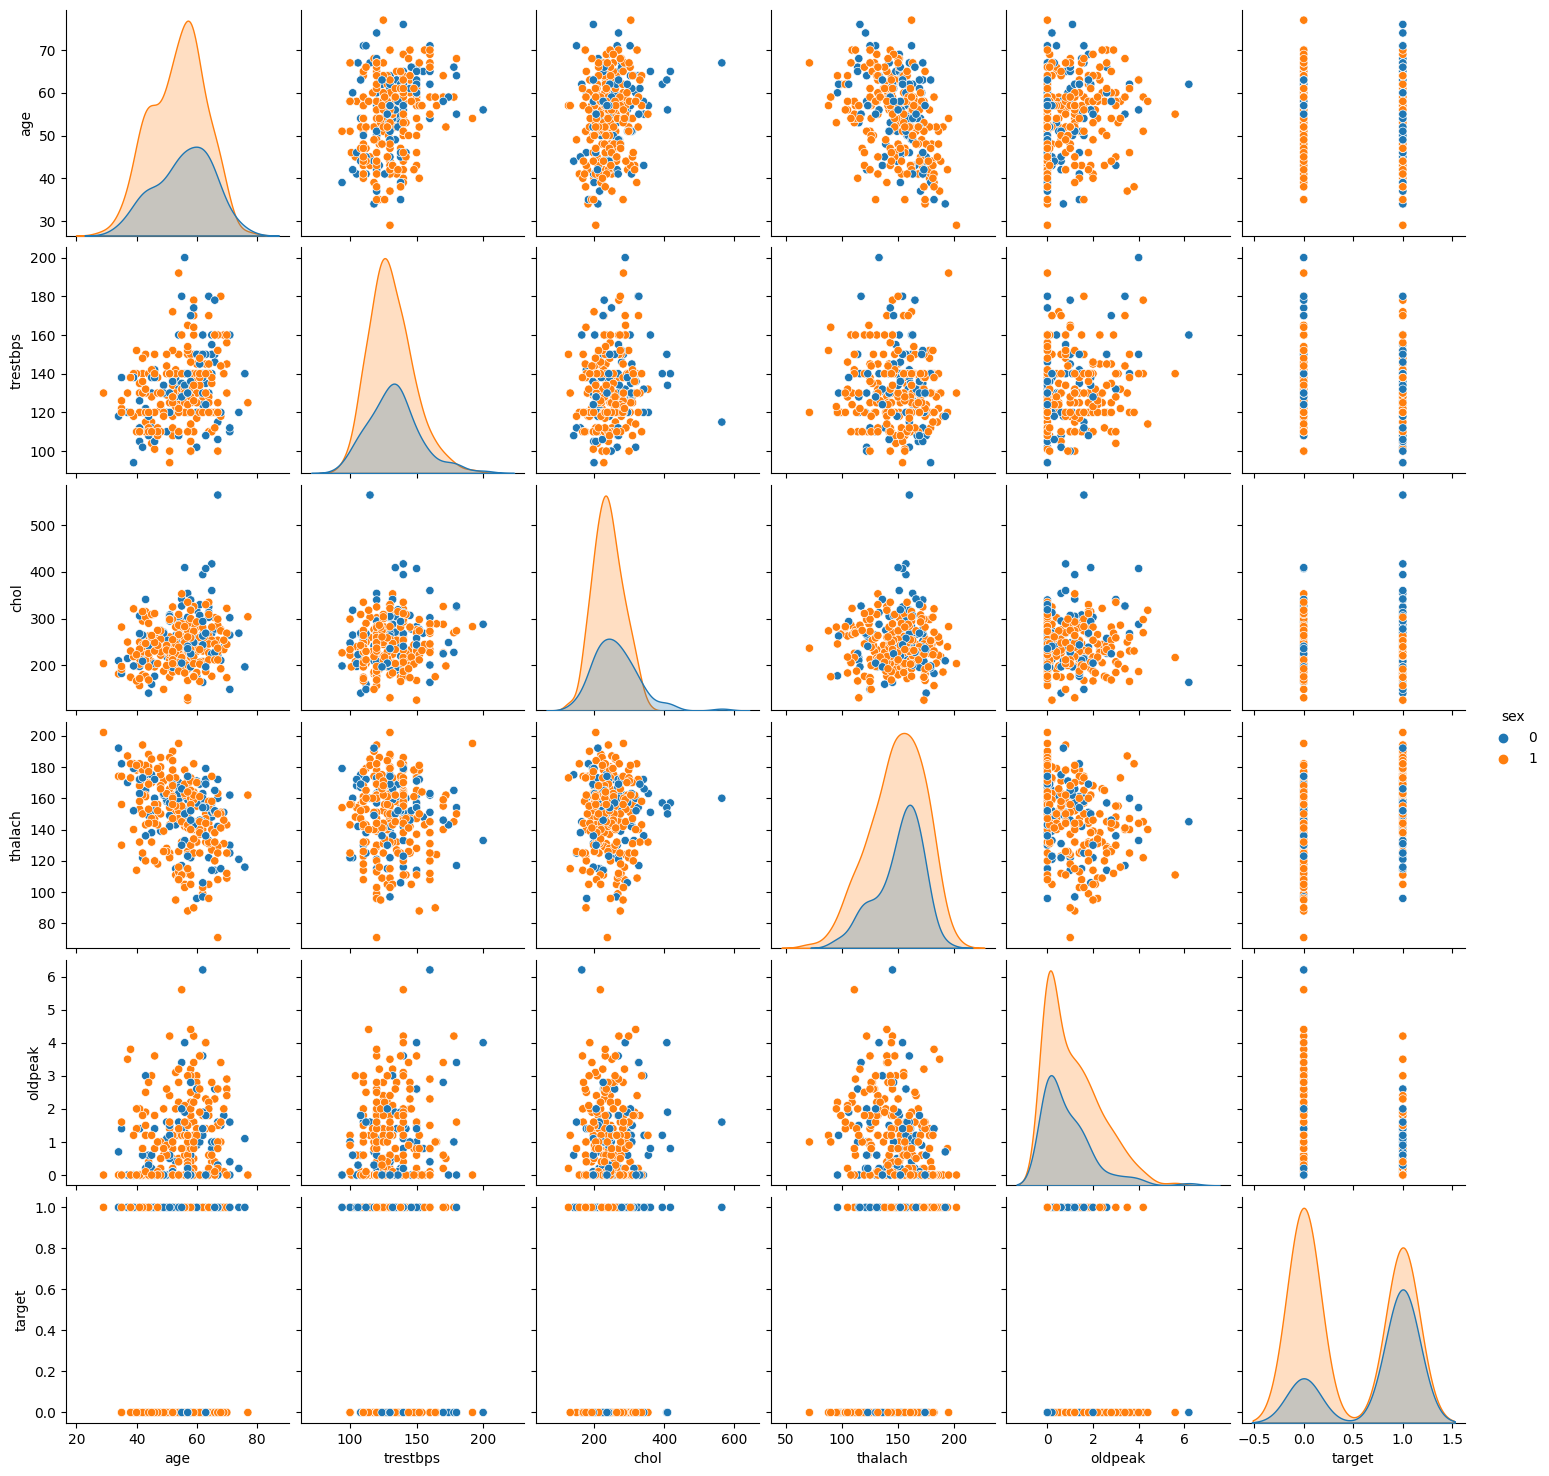

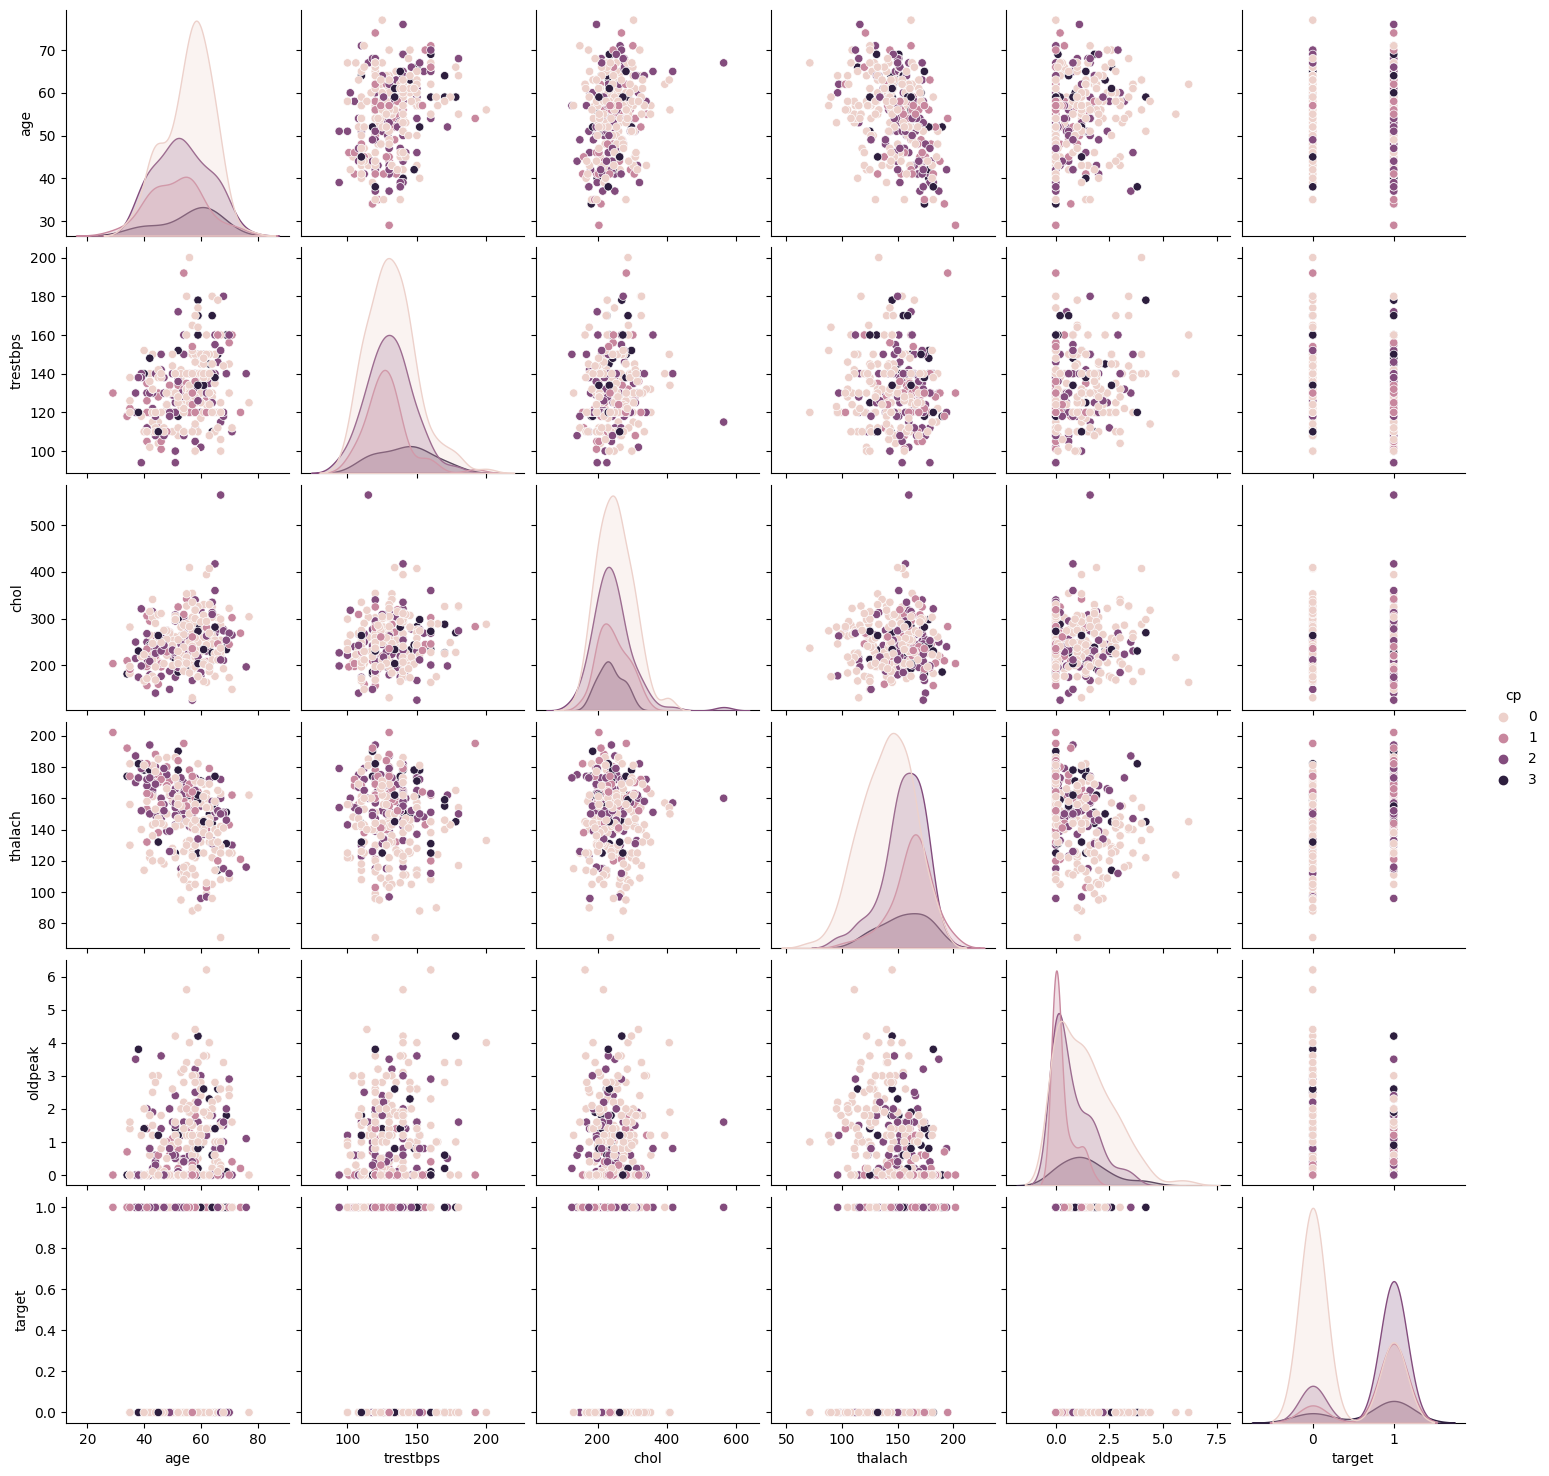

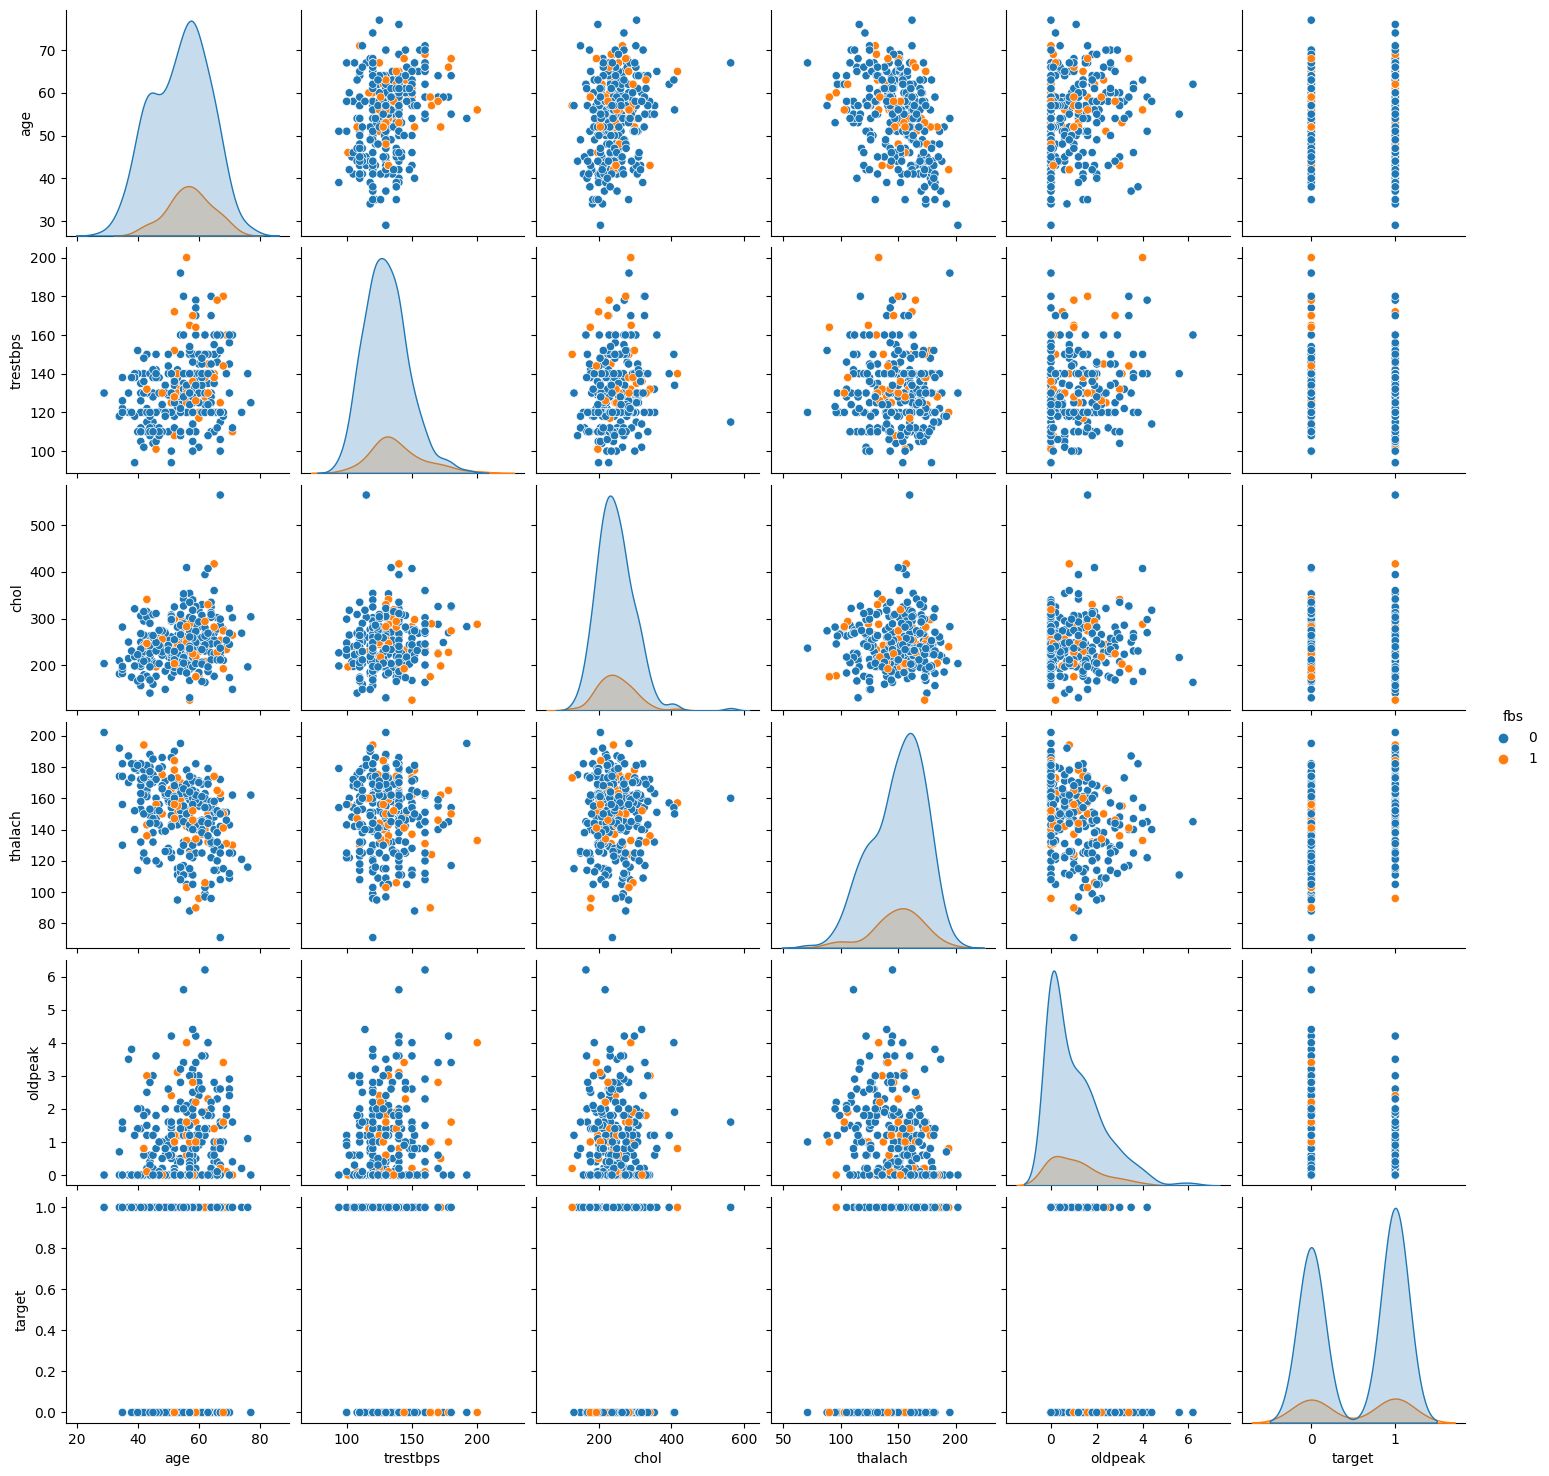

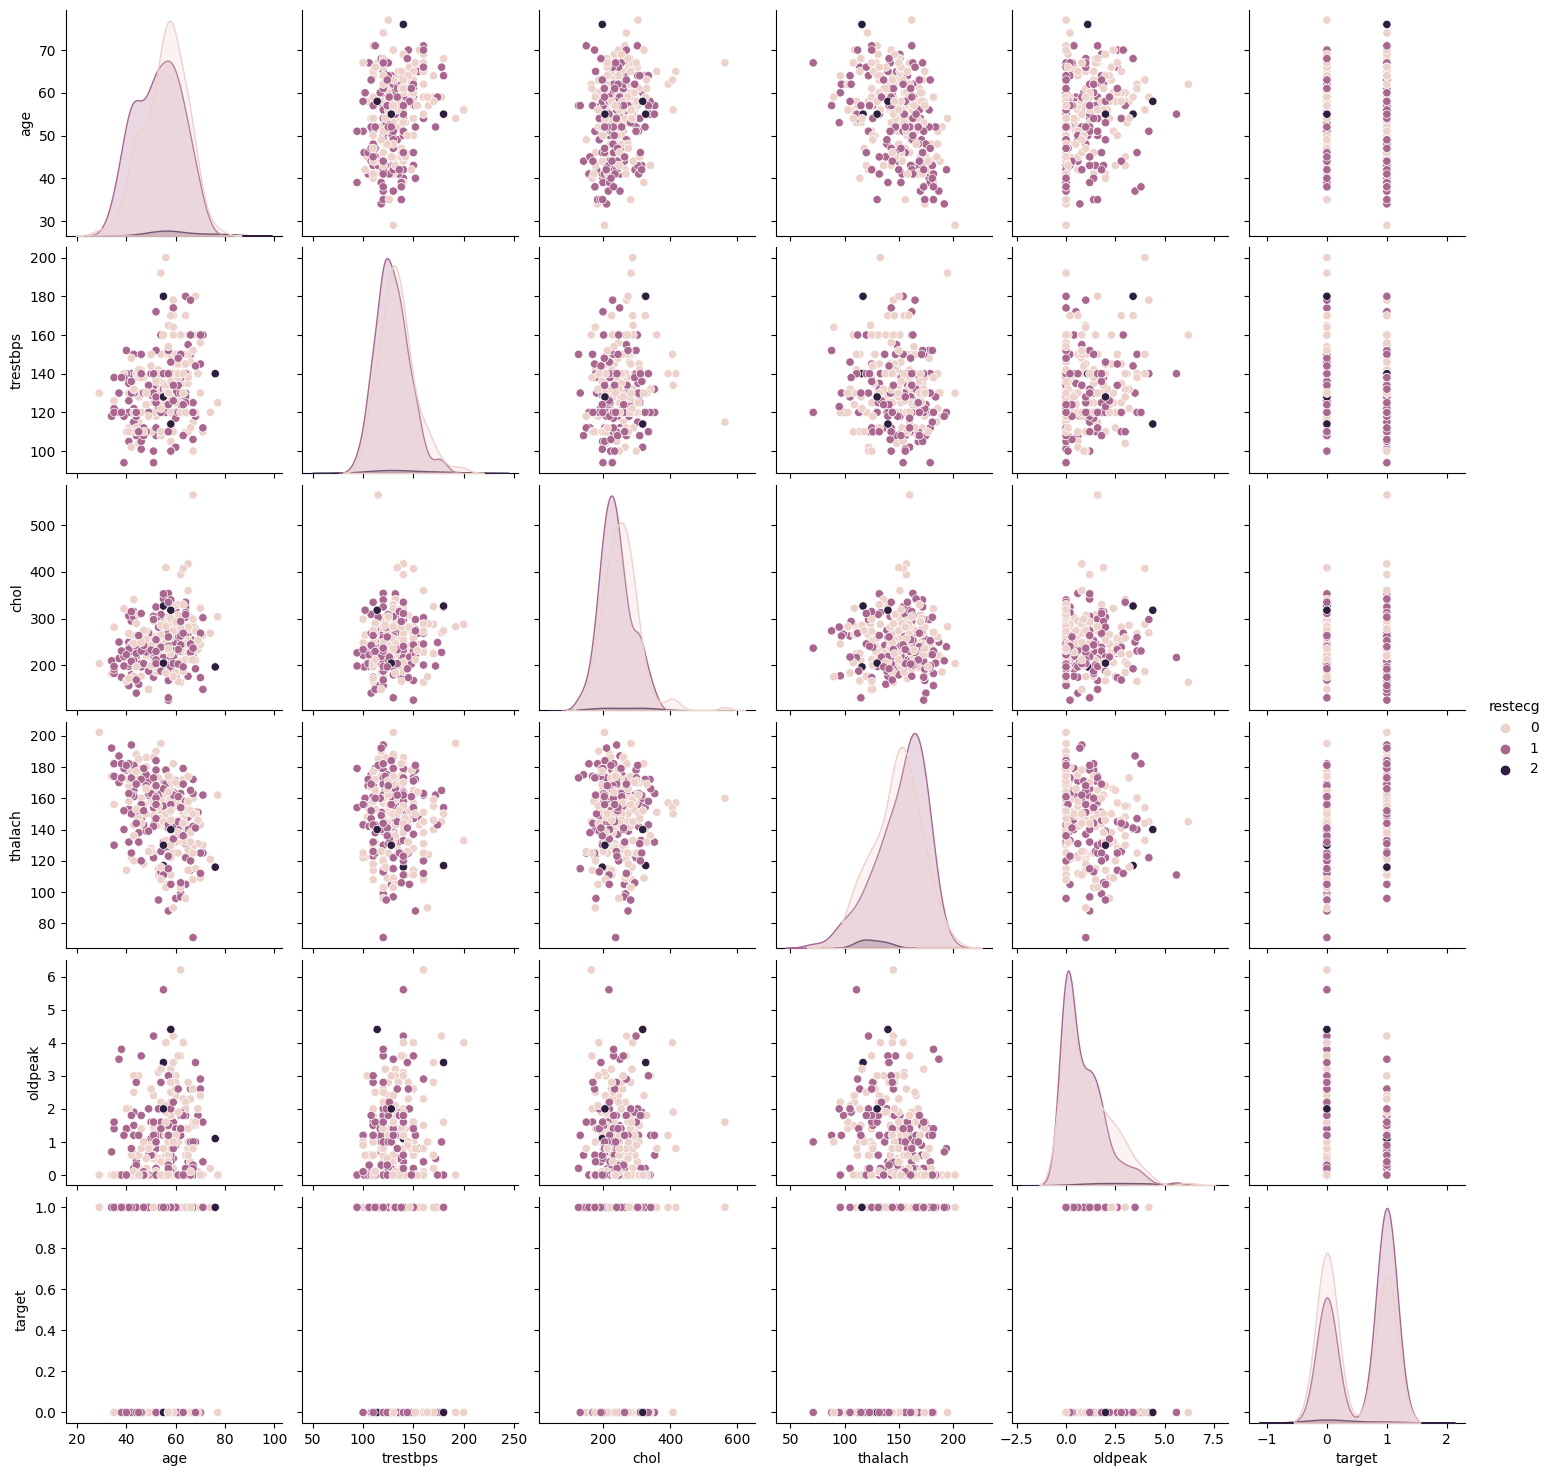

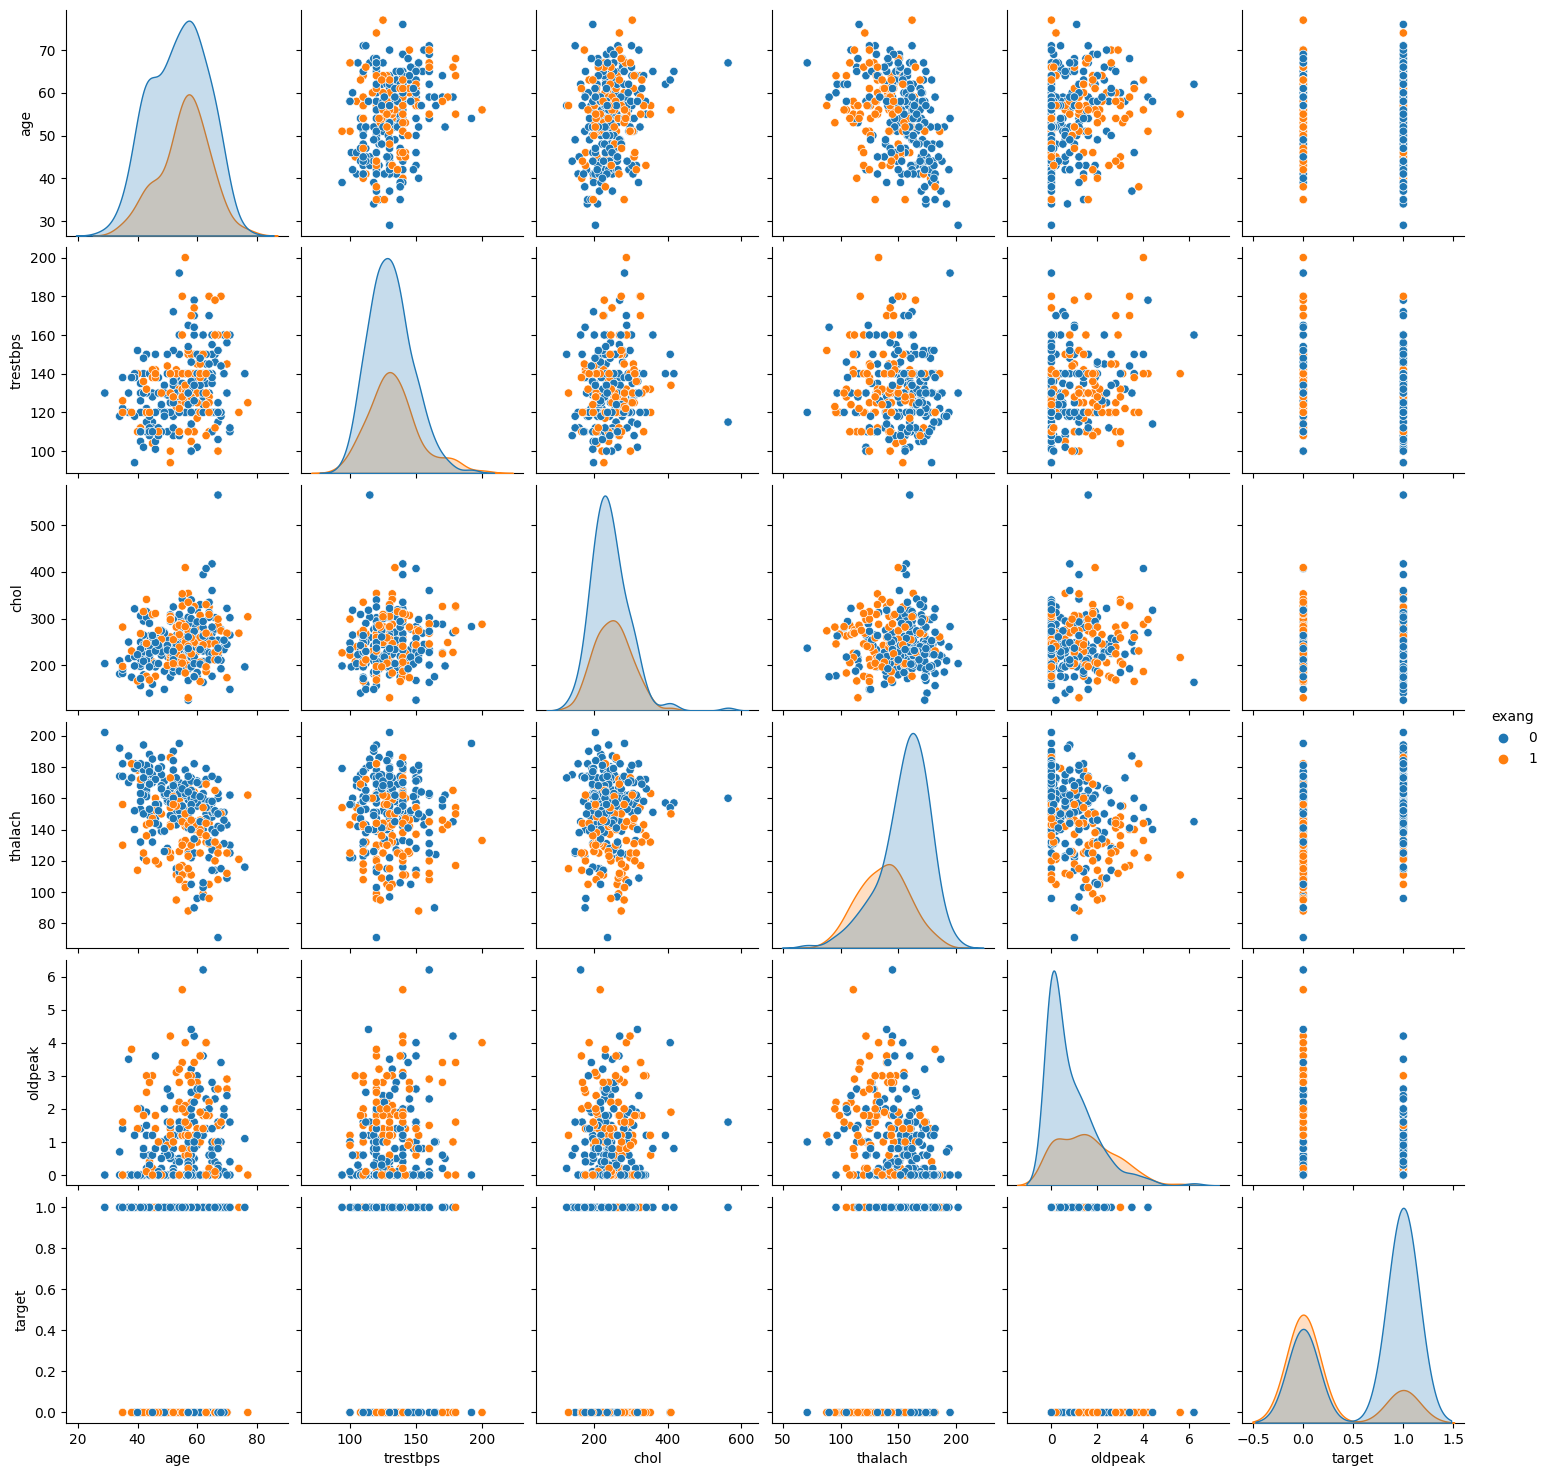

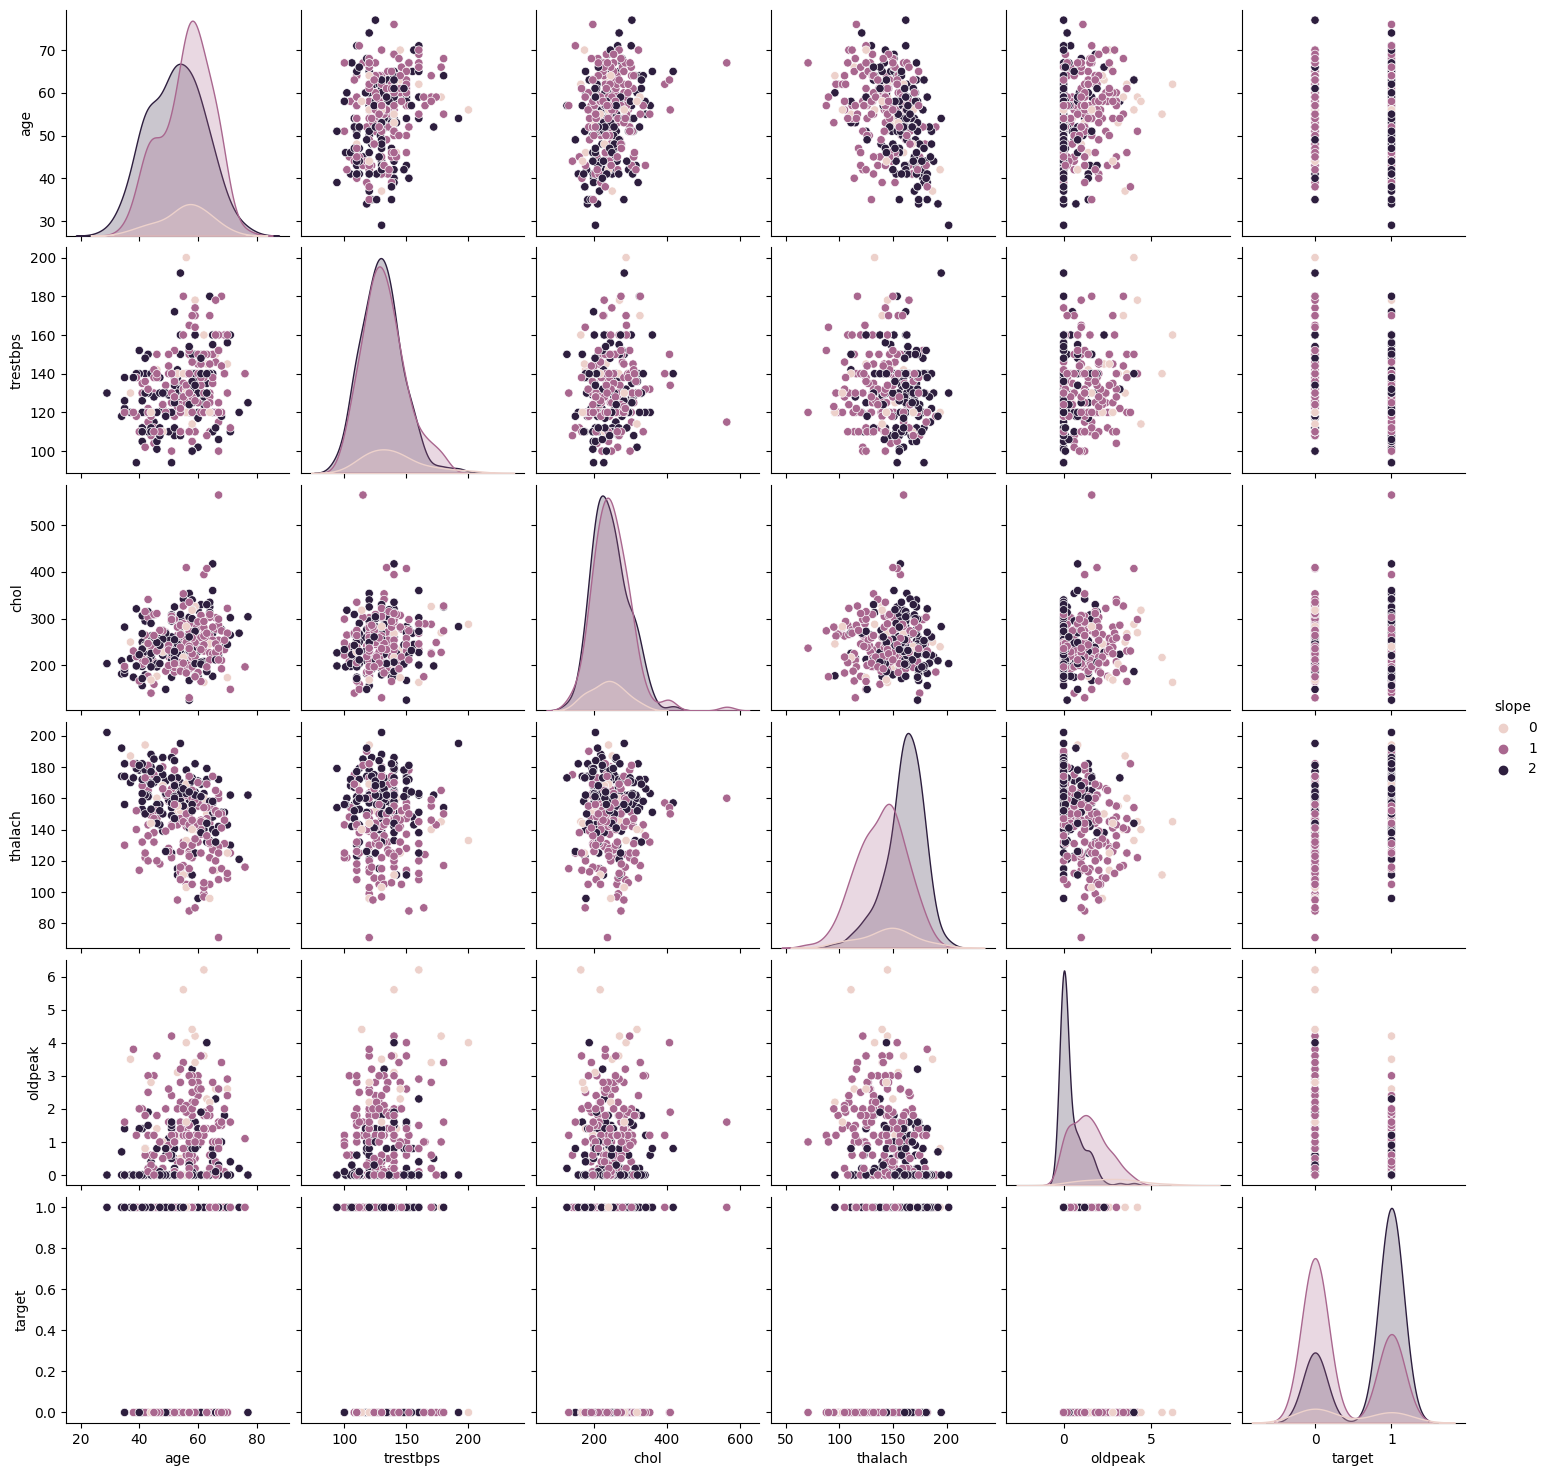

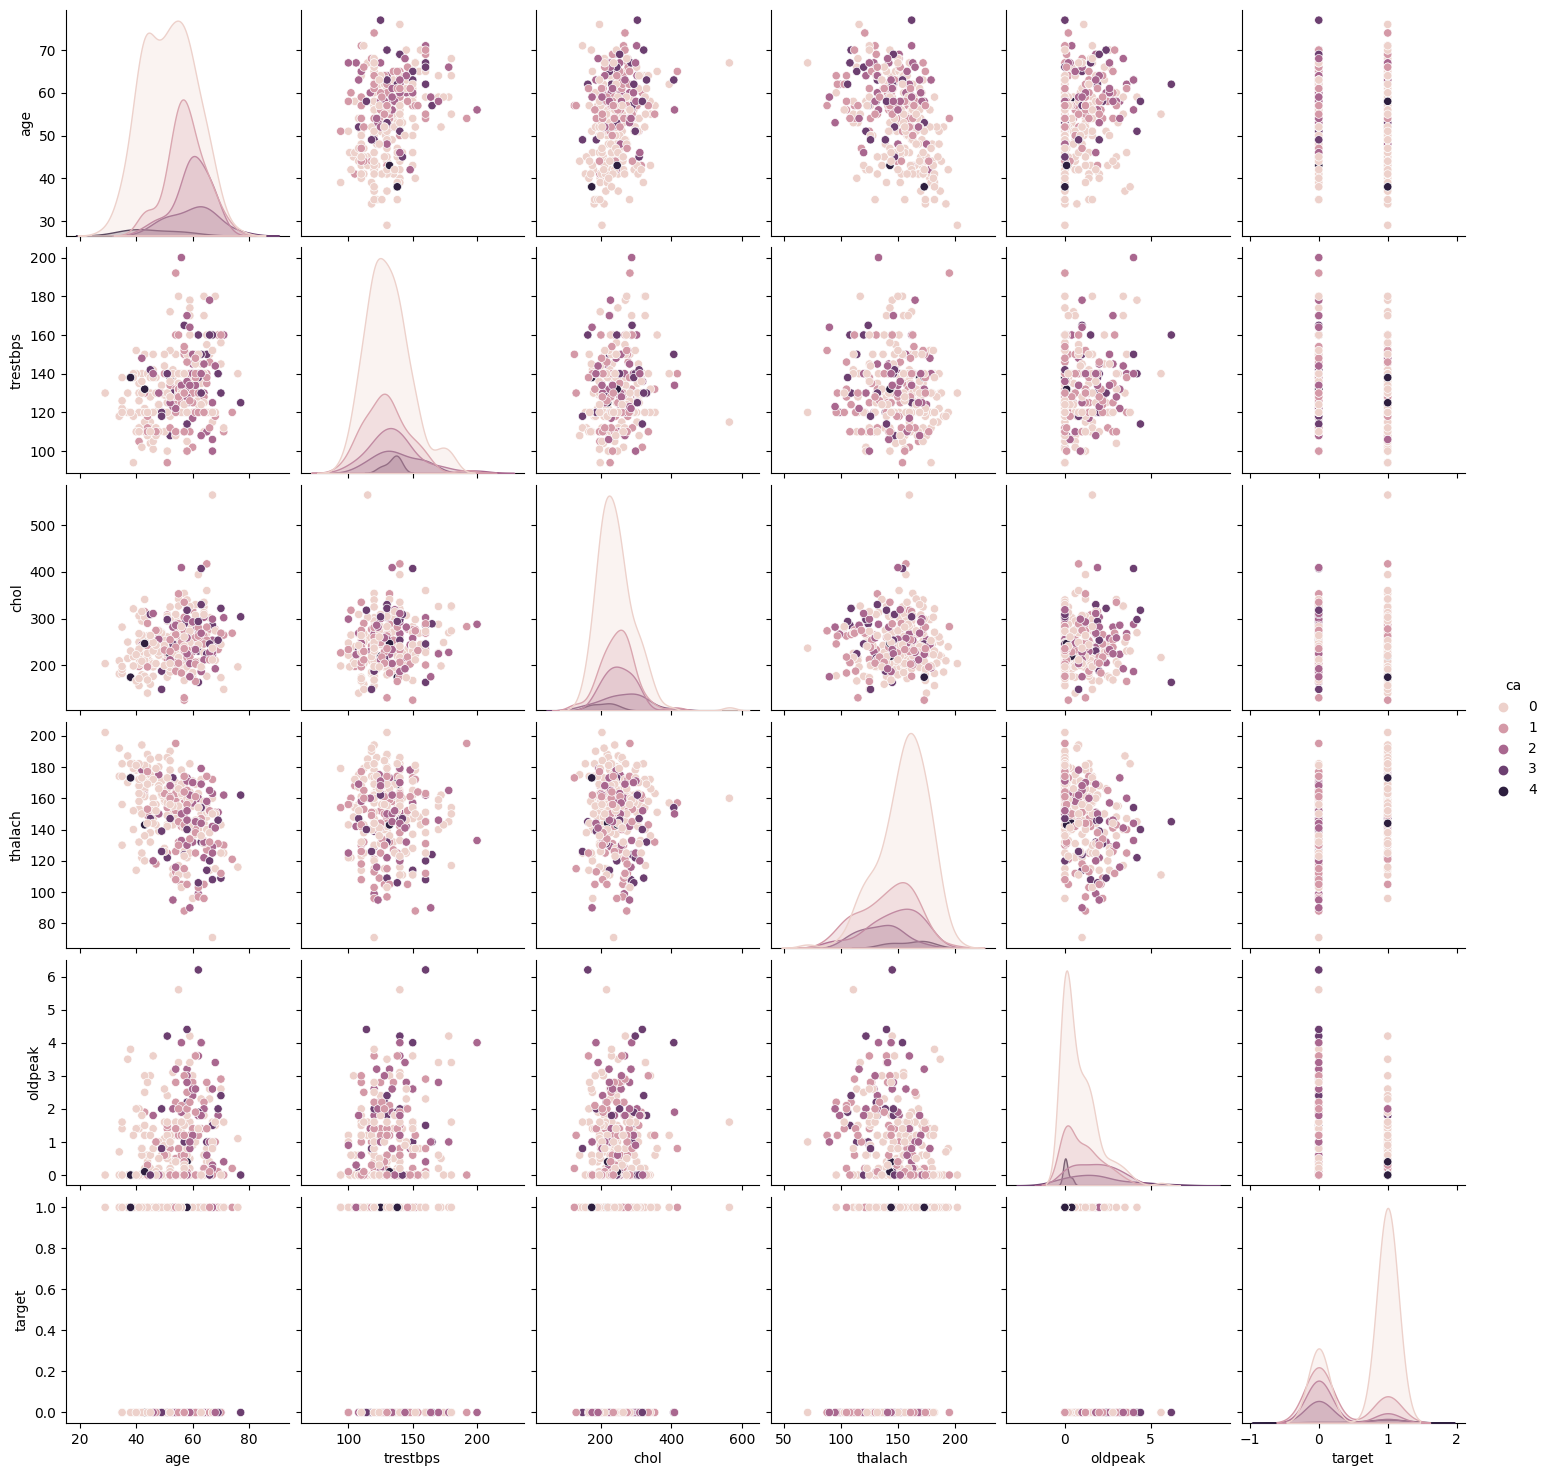

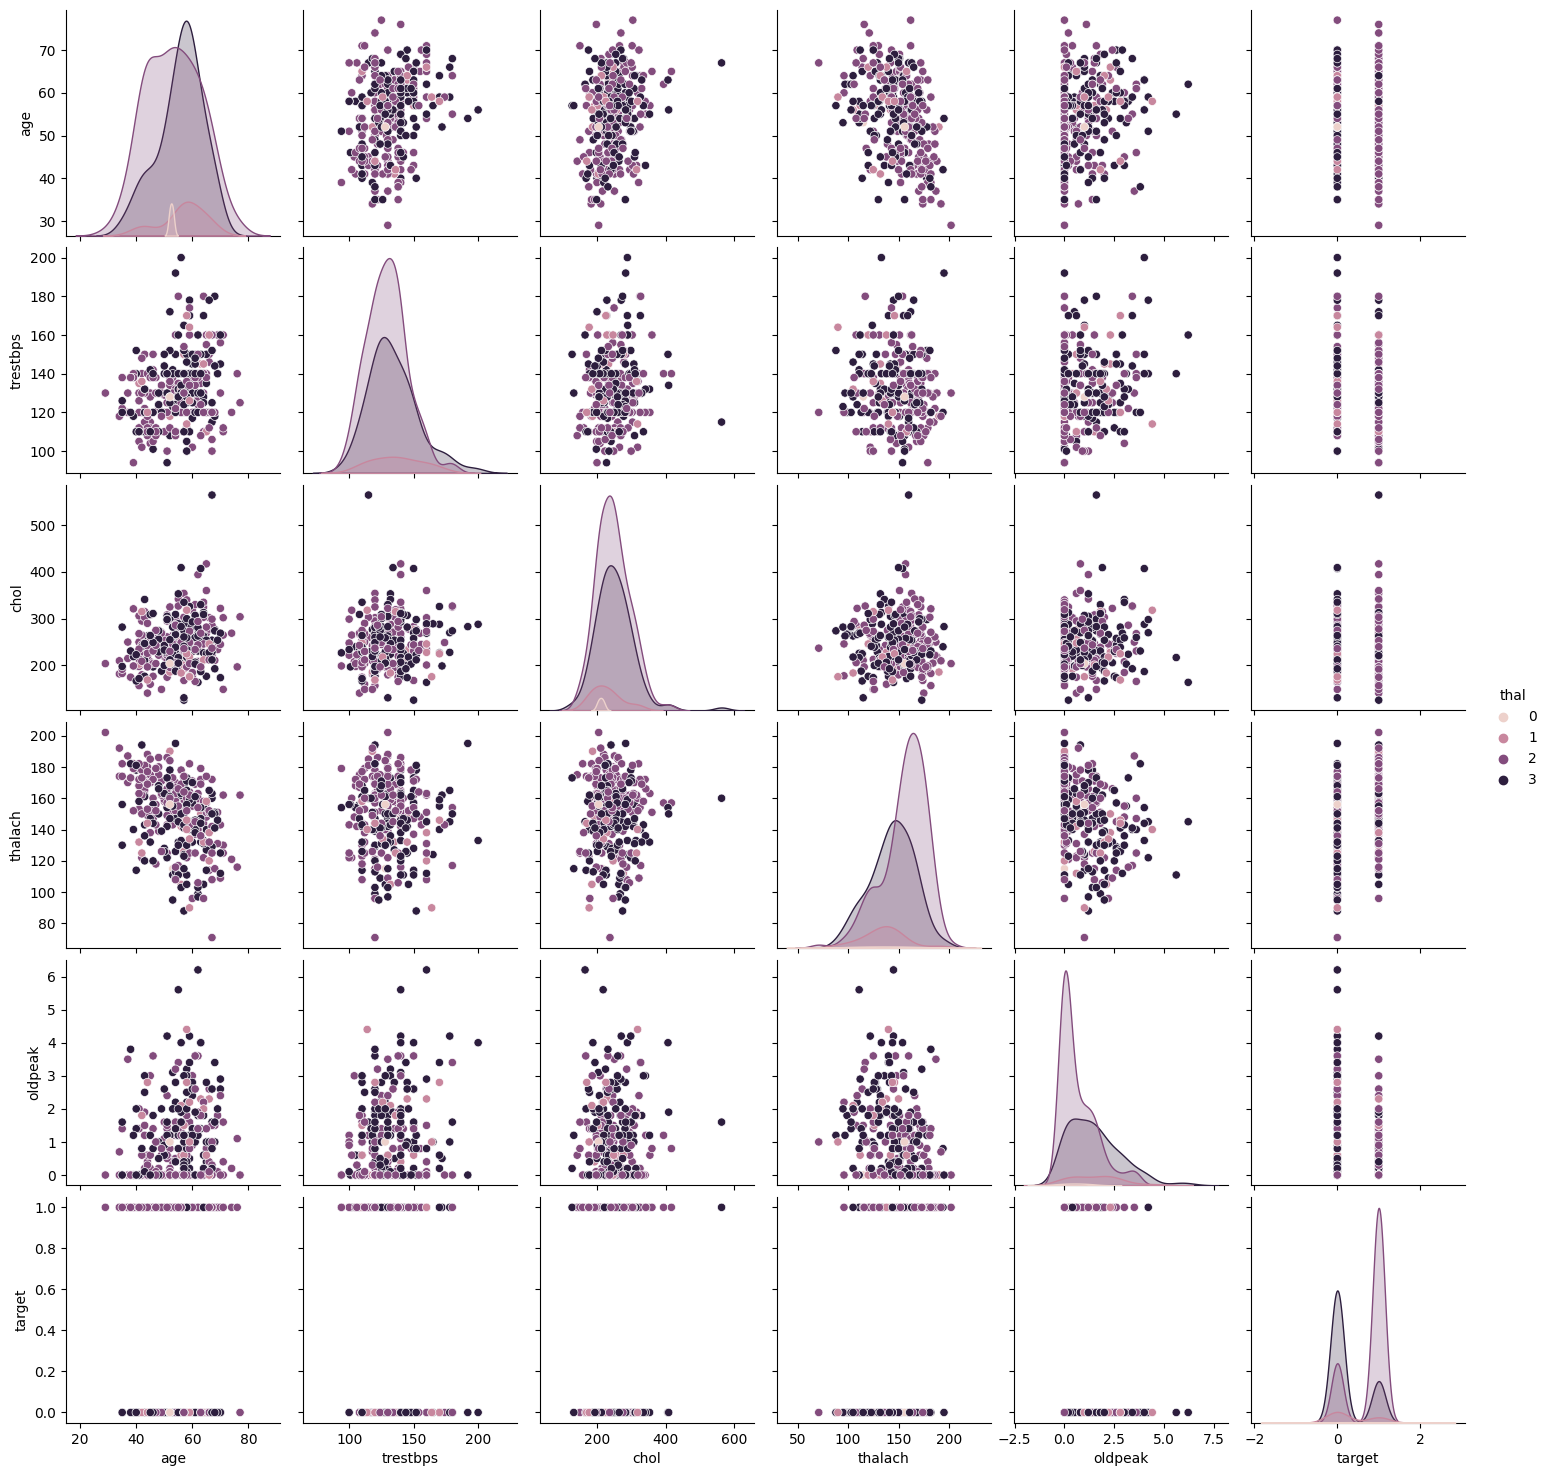

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(0, len(cat)):
    plotting = df[cont + [y] + [cat[i]]]

    plotting = pd.DataFrame(plotting)
    plotting = plotting.rename(columns={0: 'age', 
                                        1: 'trestbps',
                                        2: 'chol',
                                        3: 'thalach',
                                        4: 'oldpeak',
                                        5: 'target',
                                        6: cat[i]})

    sns.pairplot(data = plotting, hue = cat[i])
    plt.show()

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cols = cont + dummies

### convert the dummies to 1 & 0
for i in range(0, len(dummies)):
    df[dummies[i]] = df[dummies[i]].astype(int)

X = df[cols]
y = df['target']
percent_test_train_split = 0.75

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=1 - percent_test_train_split)

# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

# X_train_std = pd.DataFrame(X_train_std, columns=cols)
# X_test_std = pd.DataFrame(X_test_std, columns=cols)

X_train[cont] = (X_train[cont] - X_train[cont].mean()) / X_train[cont].std()
X_test[cont] = (X_test[cont] - X_train[cont].mean()) / X_train[cont].std()

In [17]:
def roc_curve_fun(X_test, y_test, model, model_str):
    
    # roc curve and auc
    from sklearn.datasets import make_classification
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    # predict probabilities
    lr_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    # summarize scores
    print('\nNo Skill: ROC AUC=%.3f' % (ns_auc))
    print(model_str + ': ROC AUC=%.3f' % (lr_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    # plot the roc curve for the model
    fig, ax = plt.subplots()
    ax.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    ax.plot(lr_fpr, lr_tpr, marker='.', label = model_str + ': ROC AUC=%.3f' % (lr_auc) )
    
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-0.1, 1.1)

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')

    # show the legend
    pyplot.legend()
    pyplot.title('ROC Curve')

    # show the plot
    pyplot.show()

In [18]:
def pr_curve_fun(X_test, y_test, model, model_str):
    # precision-recall curve and f1
    from sklearn.datasets import make_classification
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    from matplotlib import pyplot

    # predict probabilities
    lr_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # predict class values
    yhat = model.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

    # summarize scores
    print(model_str+' : f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    
    fig, ax = plt.subplots()
    ax.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    ax.plot(lr_recall, lr_precision, marker='.', label = model_str+' : auc=%.3f' % (lr_auc))
    
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-0.1, 1.1)

    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    # show the legend
    plt.title('PR Curve')
    plt.legend()

    # show the plot
    pyplot.show()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],           # Regularization penalty ('l1' or 'l2')
    'C': [0.001, 0.01, 0.1, 1, 10],   # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
    'max_iter': [20, 50, 100, 200, 300]        # Maximum number of iterations
}

# Create the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=0)

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=logreg_classifier, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'C': 1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.771


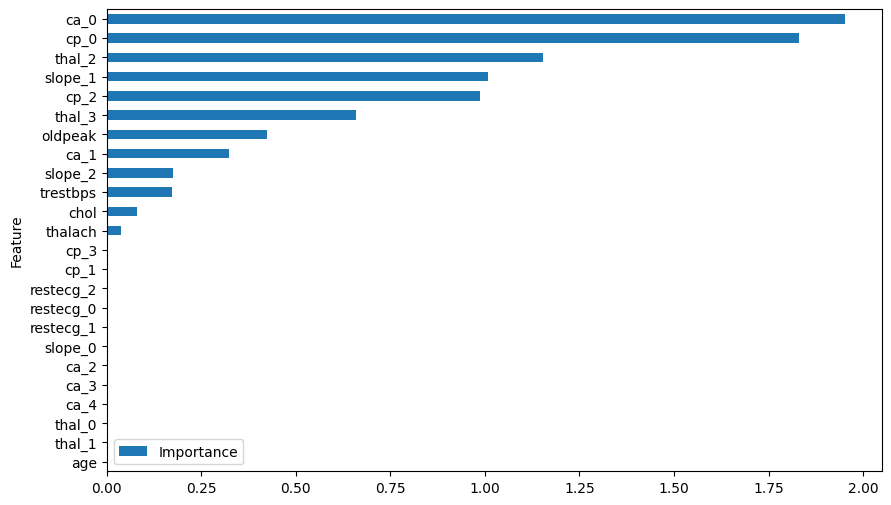

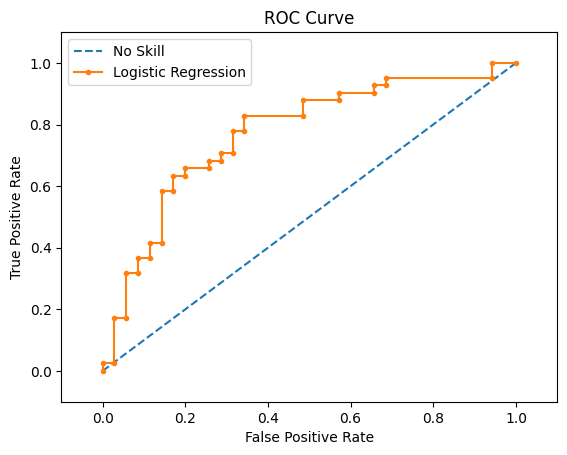

Logistic Regression : f1=0.000 auc=0.764


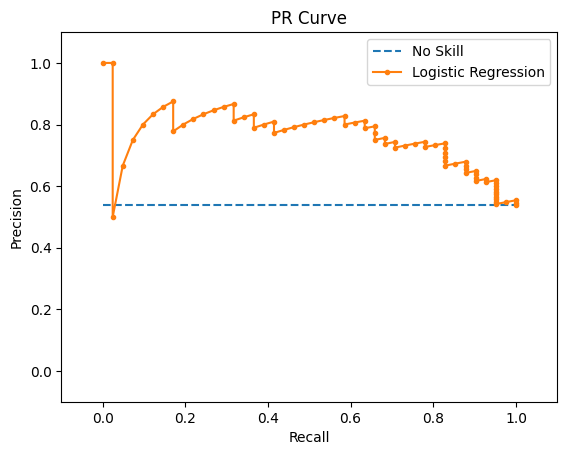

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        35
           1       0.00      0.00      0.00        41

    accuracy                           0.46        76
   macro avg       0.23      0.50      0.32        76
weighted avg       0.21      0.46      0.29        76



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.linear_model import LogisticRegression
    
# fit a model
model = LogisticRegression(C = 1, max_iter= 100, penalty= 'l1', solver= 'liblinear')
model.fit(X_train, y_train)
yhat = model.predict(X_test)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

roc_curve_fun(X_test = X_test, 
              y_test = y_test, 
              model = model,
              model_str = "Logistic Regression")

pr_curve_fun(X_test = X_test,
             y_test = y_test,
             model = model,
             model_str = "Logistic Regression")

from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [1, 2, 3],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [50, 100, 200, 300],
    'min_child_weight': [7, 9, 11, 13],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 0.1, 0.2],
}

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=0, objective='binary:logistic')

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 9, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.7}


 1) cp_0                           0.209335
 2) thal_2                         0.184963
 3) ca_0                           0.158790
 4) slope_1                        0.106709
 5) thal_3                         0.077961
 6) slope_2                        0.052761
 7) thalach                        0.041373
 8) age                            0.037914
 9) cp_2                           0.036158
10) oldpeak                        0.034592
11) trestbps                       0.026811
12) chol                           0.020728
13) restecg_1                      0.011906
14) ca_1                           0.000000
15) ca_2                           0.000000
16) ca_3                           0.000000
17) slope_0                        0.000000
18) ca_4                           0.000000
19) restecg_0                      0.000000
20) cp_3                           0.000000
21) cp_1                           0.000000
22) thal_0                         0.000000
23) thal_1                      

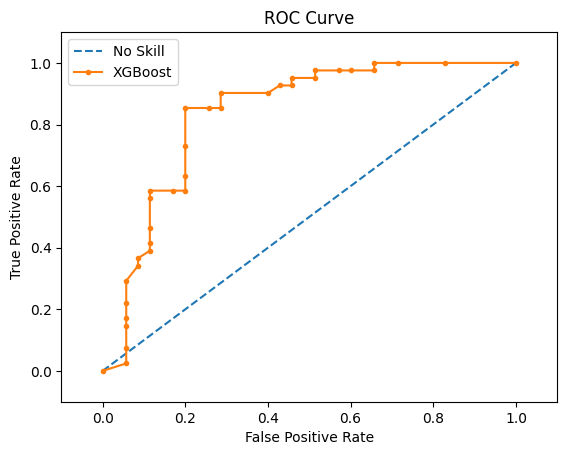

XGBoost : f1=0.828 auc=0.772


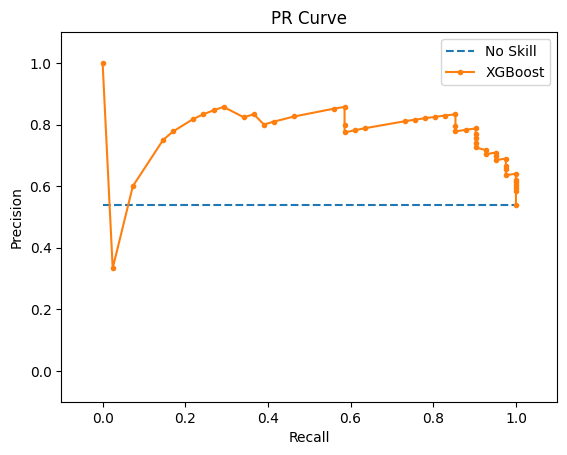

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        35
           1       0.78      0.88      0.83        41

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



<Axes: ylabel='Feature'>

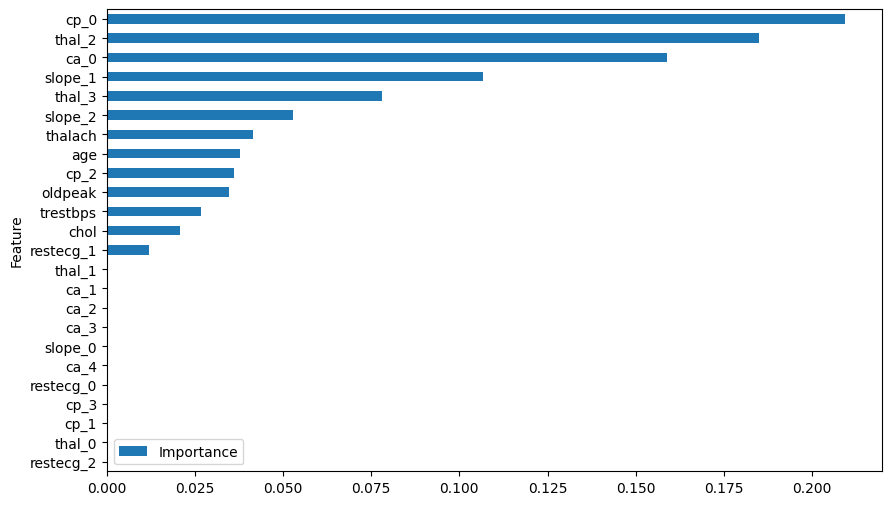

In [53]:
from xgboost import XGBClassifier
model = XGBClassifier(colsample_bytree = 0.8, 
                      gamma = 0, 
                      learning_rate = 0.01, 
                      max_depth = 2, 
                      min_child_weight = 9, 
                      n_estimators = 200, 
                      reg_alpha = 0, 
                      reg_lambda = 0, 
                      subsample = 0.7)
model.fit(X_train, y_train)

importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = cols
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

yhat = model.predict(X_test)

roc_curve_fun(X_test = X_test, 
              y_test = y_test, 
              model = model,
              model_str = "XGBoost")

pr_curve_fun(X_test = X_test,
             y_test = y_test,
             model = model,
             model_str = "XGBoost")

from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

feature_importance = pd.DataFrame({'Feature': np.array(feat_labels)[sorted_indices], 
                                   'Importance': np.array(importances)[sorted_indices] })
feature_importance['Importance'] = feature_importance['Importance'].astype(float)
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [52]:
feature_importance = pd.DataFrame({'Feature': np.array(feat_labels)[sorted_indices], 
                                   'Importance': np.array(importances)[sorted_indices] })
feature_importance['Importance'] = feature_importance['Importance'].astype(float)


Feature  Importance
0        cp_0    0.209335
1      thal_2    0.184963
2        ca_0    0.158790
3     slope_1    0.106709
4      thal_3    0.077961
5     slope_2    0.052761
6     thalach    0.041373
7         age    0.037914
8        cp_2    0.036158
9     oldpeak    0.034592
10   trestbps    0.026811
11       chol    0.020728
12  restecg_1    0.011906
13       ca_1    0.000000
14       ca_2    0.000000
15       ca_3    0.000000
16    slope_0    0.000000
17       ca_4    0.000000
18  restecg_0    0.000000
19       cp_3    0.000000
20       cp_1    0.000000
21     thal_0    0.000000
22     thal_1    0.000000
23  restecg_2    0.000000

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [5, 10, 50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5400 fits failed out of a total of 21600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/site-packages/sklear

 1) oldpeak                        0.135350
 2) thalach                        0.119588
 3) ca_0                           0.110860
 4) thal_3                         0.097757
 5) trestbps                       0.083814
 6) age                            0.075001
 7) cp_0                           0.069150
 8) thal_2                         0.068796
 9) chol                           0.049370
10) cp_2                           0.044126
11) slope_2                        0.038427
12) slope_1                        0.017001
13) ca_1                           0.016828
14) ca_2                           0.016157
15) restecg_0                      0.015466
16) restecg_1                      0.014933
17) ca_3                           0.009154
18) thal_1                         0.005632
19) cp_1                           0.004312
20) cp_3                           0.004244
21) ca_4                           0.002124
22) slope_0                        0.001909
23) thal_0                      

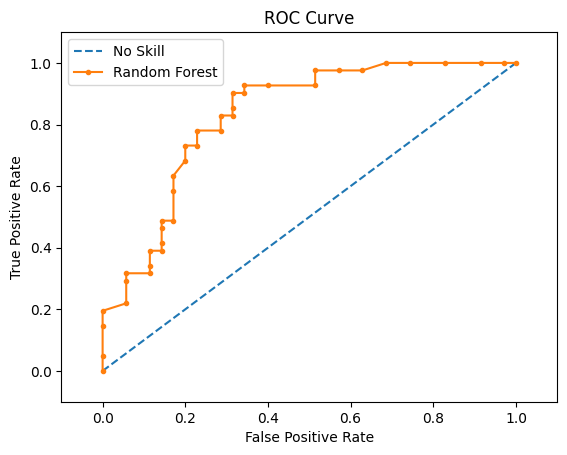

Random Forest : f1=0.791 auc=0.827


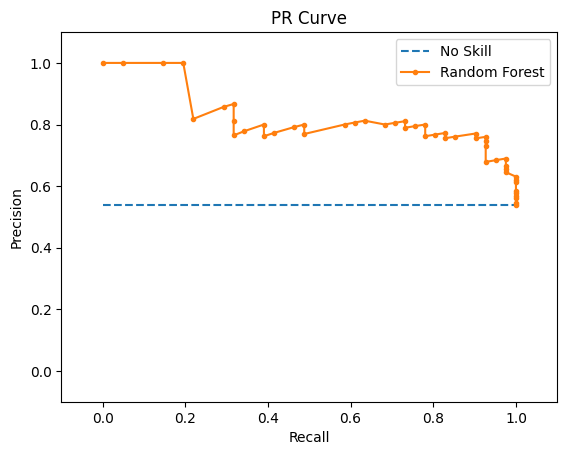

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        35
           1       0.76      0.83      0.79        41

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



In [30]:
# fit a model
model = RandomForestClassifier(random_state=0, 
                               bootstrap = True, 
                               criterion = 'entropy', 
                               max_depth = 10, 
                               max_features ='sqrt', 
                               min_samples_leaf = 2,
                               min_samples_split = 2,
                               n_estimators = 10)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = cols
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))
roc_curve_fun(X_test = X_test, 
              y_test = y_test, 
              model = model,
              model_str = "Random Forest")

pr_curve_fun(X_test = X_test,
             y_test = y_test,
             model = model,
             model_str = 'Random Forest')

from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

In [33]:
df[['thal_2', 'thal']]

thal_2  thal
0         0     1
1         1     2
2         1     2
3         1     2
4         1     2
5         0     1
6         1     2
7         0     3
8         0     3
9         1     2
10        1     2
11        1     2
12        1     2
13        1     2
14        1     2
15        1     2
16        1     2
17        1     2
18        1     2
19        1     2
20        0     3
21        1     2
22        1     2
23        1     2
24        0     3
25        1     2
26        1     2
27        1     2
28        1     2
29        1     2
30        1     2
31        0     3
32        1     2
33        1     2
34        1     2
35        1     2
36        1     2
37        0     3
38        1     2
39        1     2
40        1     2
41        1     2
42        1     2
43        1     2
44        1     2
45        1     2
46        1     2
47        1     2
48        0     0
49        1     2
50        1     2
51        1     2
52        0     3
53        1     2
54        1     2
55        1     2
56        1     2
57        1     2
58        1     2
59        1     2
60        1     2
61        0     3
62        0     1
63        0     1
64        1     2
65        1     2
66        1     2
67        1     2
68        1     2
69        1     2
70        0     3
71        0     3
72        1     2
73        1     2
74        1     2
75        1     2
76        1     2
77        1     2
78        1     2
79        0     3
80        1     2
81        1     2
82        1     2
83        0     3
84        1     2
85        0     3
86        0     3
87        0     3
88        1     2
89        1     2
90        1     2
91        0     3
92        1     2
93        1     2
94        1     2
95        0     3
96        1     2
97        0     3
98        1     2
99        1     2
100       1     2
101       0     3
102       1     2
103       0     3
104       1     2
105       1     2
106       1     2
107       1     2
108       1     2
109       1     2
110       1     2
111       0     3
112       0     3
113       0     3
114       1     2
115       1     2
116       1     2
117       0     3
118       1     2
119       1     2
120       1     2
121       1     2
122       1     2
123       1     2
124       1     2
125       1     2
126       1     2
127       1     2
128       1     2
129       1     2
130       1     2
131       1     2
132       1     2
133       1     2
134       1     2
135       1     2
136       1     2
137       1     2
138       0     1
139       0     3
140       1     2
141       1     2
142       1     2
143       1     2
144       1     2
145       1     2
146       1     2
147       1     2
148       1     2
149       1     2
150       0     1
151       1     2
152       0     3
153       1     2
154       1     2
155       1     2
156       1     2
157       1     2
158       0     3
159       0     3
160       1     2
161       1     2
162       1     2
163       1     2
164       1     2
165       1     2
166       0     3
167       1     2
168       0     3
169       0     3
170       0     1
171       0     3
172       1     2
173       0     3
174       0     3
175       0     3
176       0     3
177       1     2
178       0     3
179       0     1
180       0     3
181       0     3
182       1     2
183       0     3
184       0     3
185       1     2
186       0     3
187       0     3
188       0     3
189       0     3
190       0     3
191       0     3
192       0     3
193       0     3
194       1     2
195       0     3
196       1     2
197       0     3
198       0     3
199       0     1
200       1     2
201       0     3
202       0     3
203       0     3
204       0     3
205       0     3
206       0     3
207       0     3
208       0     3
209       0     3
210       0     3
211       0     3
212       0     3
213       0     3
214       1     2
215       0     3
216       0     3
217       0     3
218       0     3
219       0     3
220       0     3
221      